In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import numpy as np

In [4]:
def load_data(filename: str) -> pd.DataFrame:
    data = pd.read_csv(f'../data/{filename}')
    data['datetime']= pd.to_datetime(data['datetime'])
    data['day_year'] = data['datetime'].dt.dayofyear
    data['year'] = data.datetime.dt.year
    data.set_index('datetime',inplace=True)
    data['rolltemp'] = data.temp.rolling(7).mean()
    data.reset_index(inplace=True)
    mean = data[data.year < 2020][['day_year','rolltemp']].groupby('day_year').mean().rename(columns={'rolltemp':'mean_temp'})
    data = data.merge(mean, right_index=True, left_on='day_year')
    data['temp_dif'] = data.rolltemp - data.mean_temp
    return data


In [133]:
def plot_temperature(data: pd.DataFrame, save: bool):
    min_temp = data.mean_temp.min()
    if min_temp > 6:
        ymin = data.mean_temp.min() - data.mean_temp.min()
    else:
        ymin = -10
    ymax = data.mean_temp.max() + 10
    fig, ax = plt.subplots(1,1, figsize=(20,10))
    label = '1980-2021'
    for year in range(1980,2024):
        title = data.name.unique()[0]
        temperature = 'rolltemp'
        color = '#c1c0d1'
        df = data[['datetime', 'day_year', 'year', temperature]][data.year == year]
        linewidth=0.35
        if year == 2023:
            color = '#de4747'
            linewidth = 2.25
            label = '2023'
            x_arrow = df.day_year.max()
            y_arrow = df[df.day_year==x_arrow][temperature].max()
            ax.annotate('2023', xy=(x_arrow+2, y_arrow), xytext=(x_arrow+13, y_arrow+1),arrowprops=dict(facecolor='#de4747', edgecolor='#de4747', linewidth=0.25), fontsize=15)
        if year == 2022:
            color = '#de47b8'
            linewidth = 1.5
            label = '2022'
            y_arrow = df[df.day_year==345][temperature].max()
            ax.annotate('2022', xy=(345, y_arrow), xytext=(350, y_arrow+3),arrowprops=dict(facecolor='#de47b8', edgecolor='#de47b8', linewidth=0.15), fontsize=12.5)
        ax.plot(df.day_year, df[temperature], color=color, linewidth=linewidth, label=label)
        label = None
    ax.plot(data.day_year, data.mean_temp, color='black', linewidth=1,linestyle=':', label='Mean')
    ax.set_xlim(-1, 367)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks(np.arange(1, 367, 30))
    y_tick_labels = [f"{label}°C" for label in ax.get_yticks()]
    ax.set_yticklabels(y_tick_labels)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.set_xlabel("Day of Year", fontsize=15)
    ax.set_ylabel("Average Temperature", fontsize=15)
    ax.set_title(title, fontsize=20, loc='center')
    ax.legend(loc=3, fontsize=15, frameon=False)
    ax.text(0.5, 0.97, "Daily mean temperature 1980-2023", fontsize=15, transform=ax.transAxes, ha='center')
    text = "Plot by @natera // Data from Visual Crossing"
    ax.text(0.98, 0.03, text, fontsize=12, color='#686778', transform=ax.transAxes, ha='right');
    if save:
        plt.savefig(f'../outputs/{title}.png', dpi=300, bbox_inches='tight');

/var/folders/74/bd6kyxhj1_ldp_sgvfdm9w640000gn/T/ipykernel_28401/3544909025.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tick_labels)
/var/folders/74/bd6kyxhj1_ldp_sgvfdm9w640000gn/T/ipykernel_28401/3544909025.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tick_labels)
/var/folders/74/bd6kyxhj1_ldp_sgvfdm9w640000gn/T/ipykernel_28401/3544909025.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tick_labels)


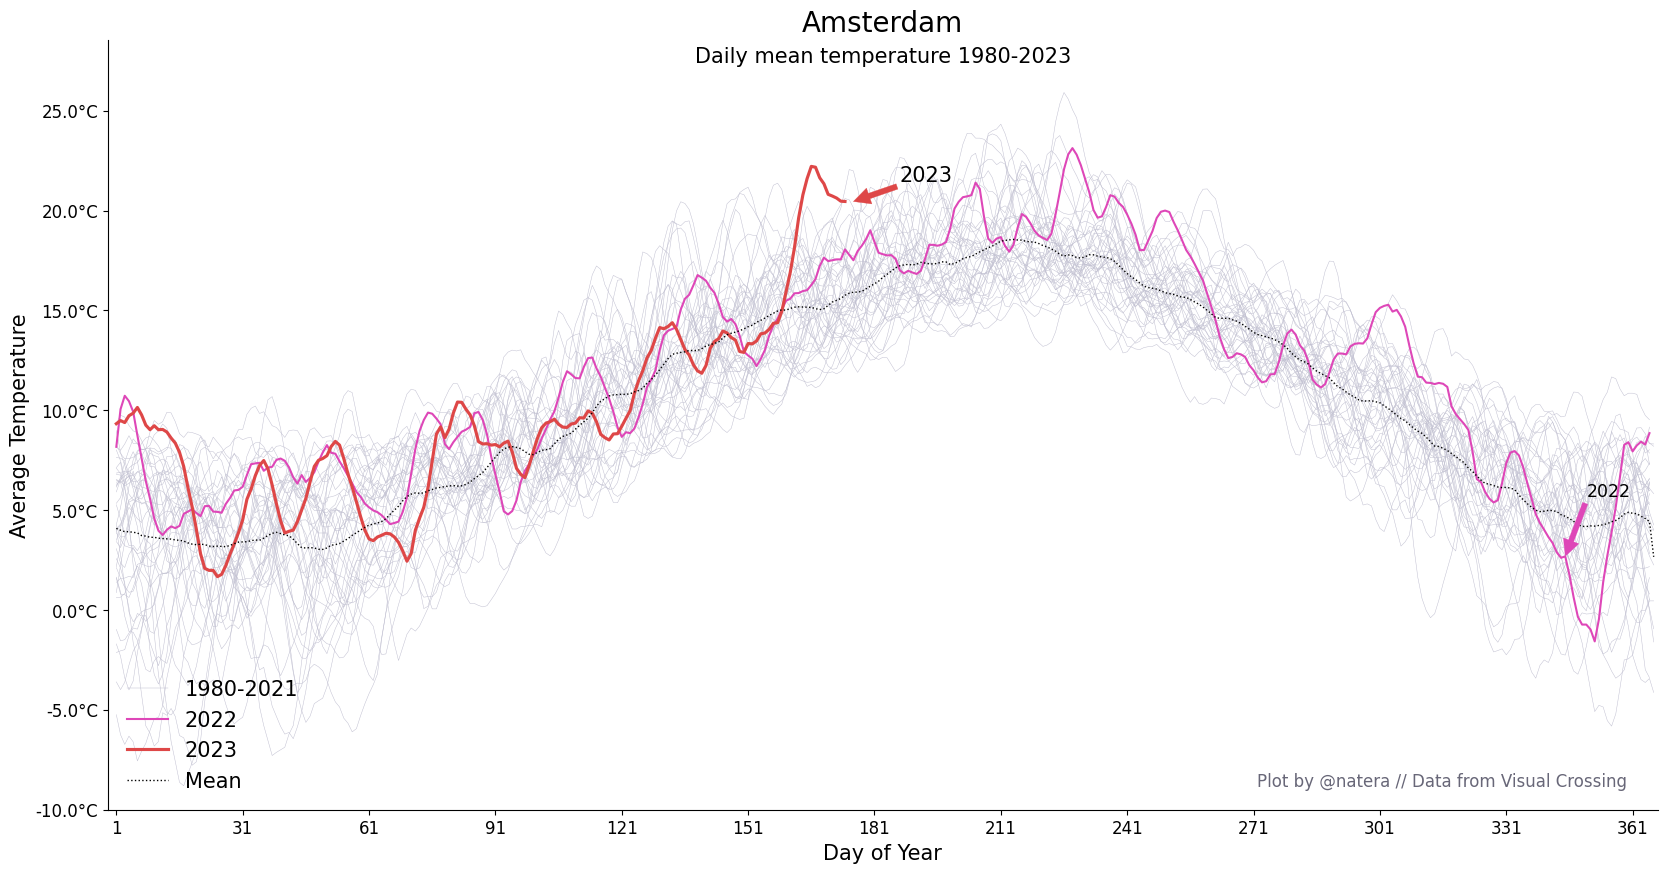

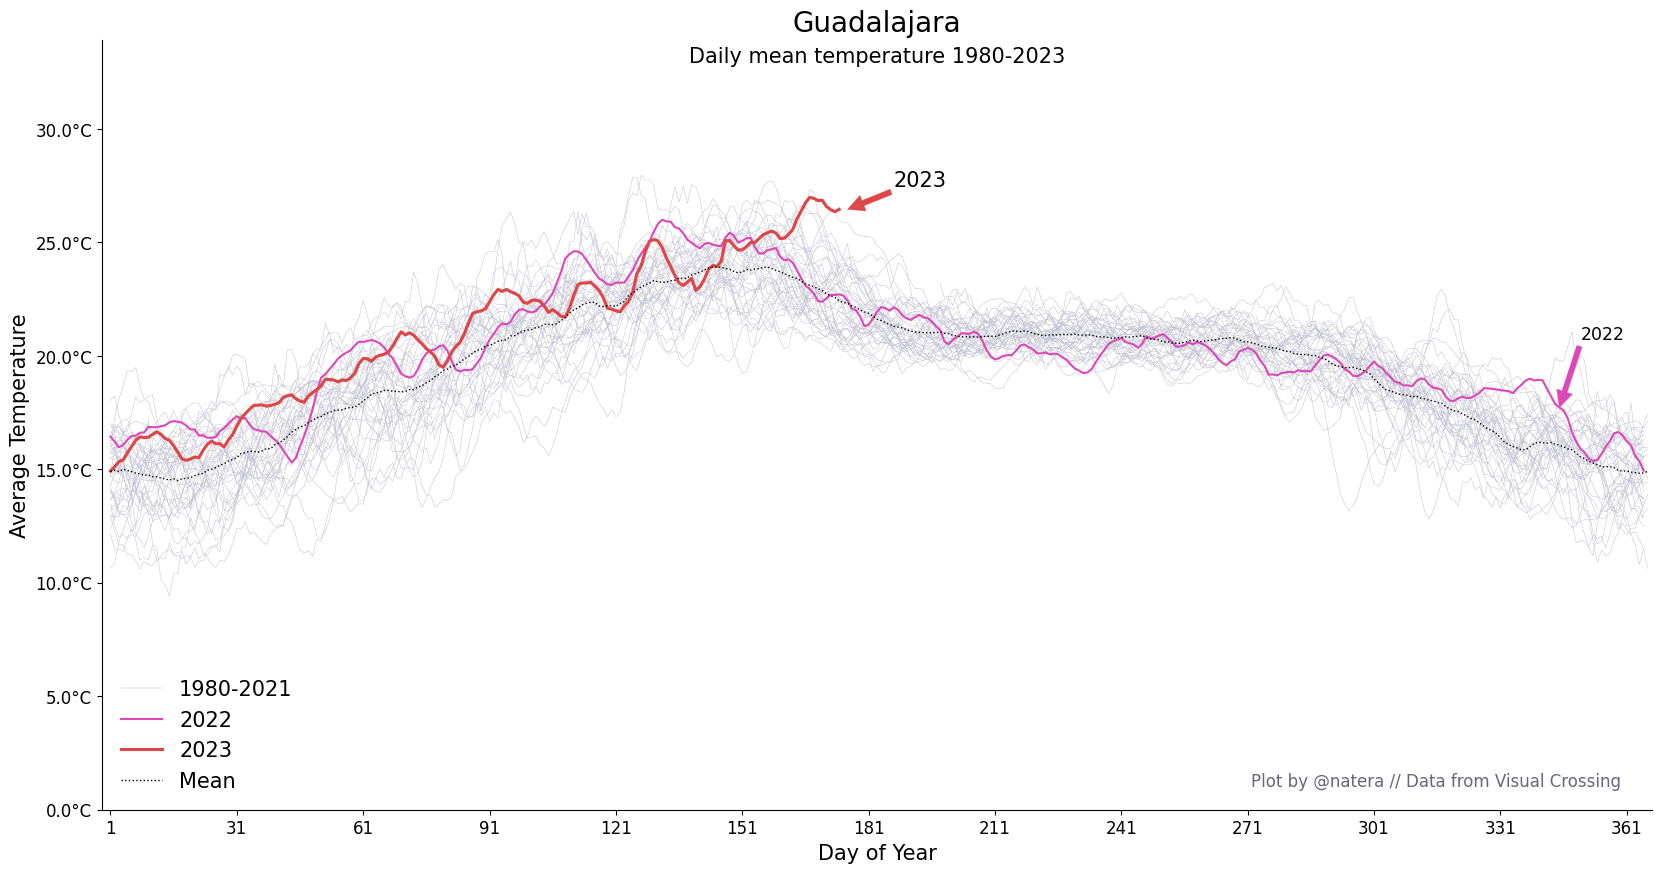

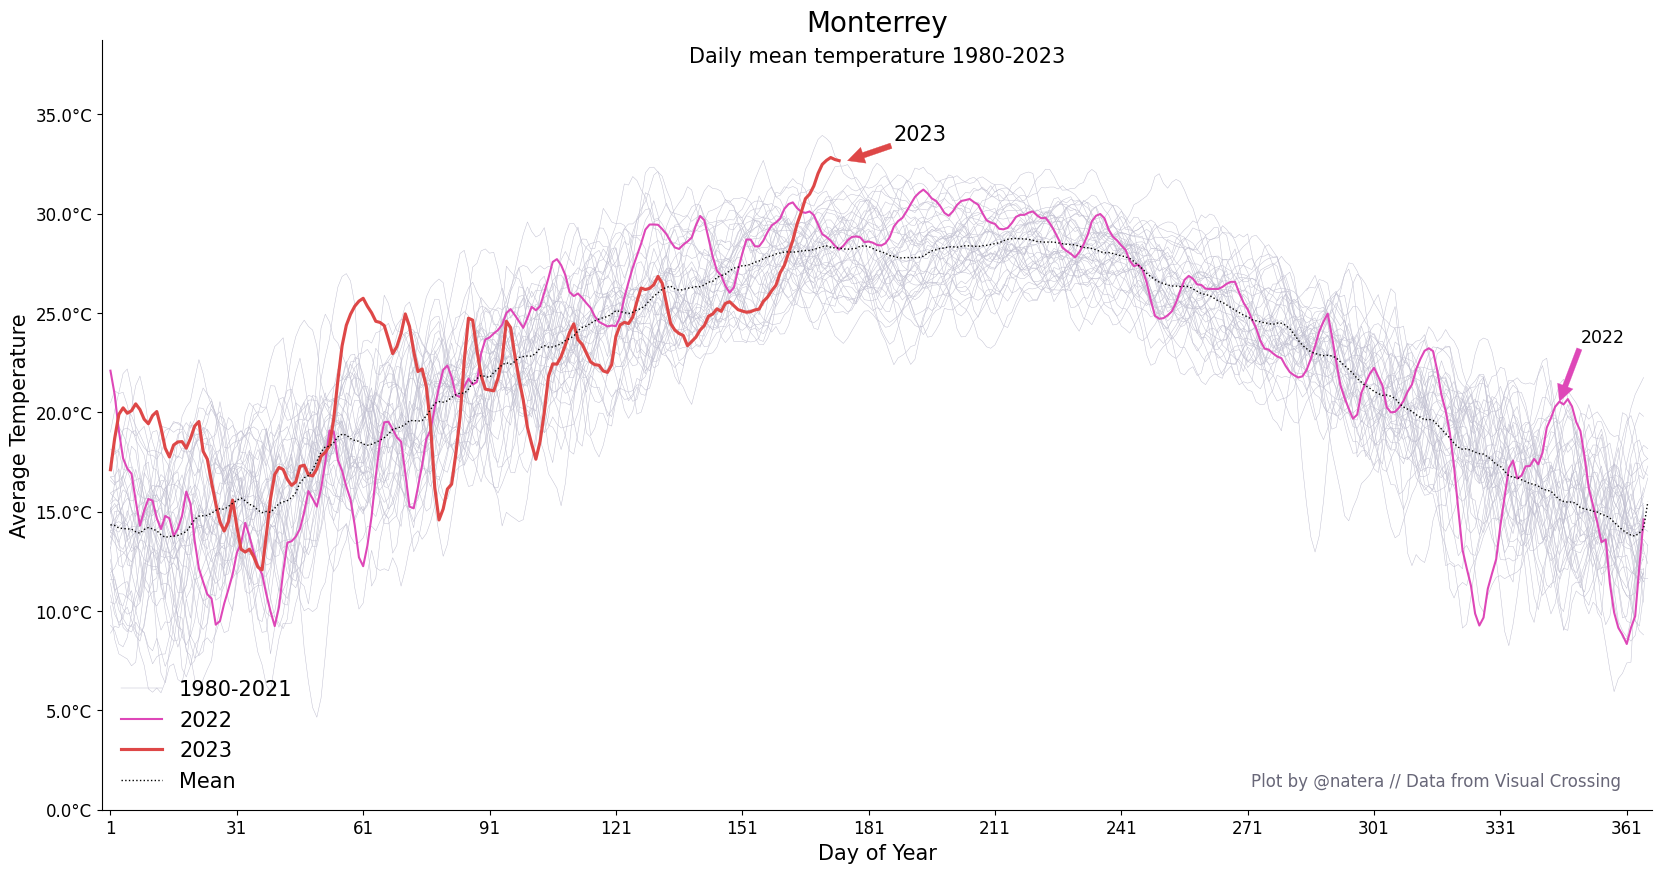

In [136]:
for city in ['ams','gdl','mty']:
    filename = f'{city}-19800101-20230623.csv'
    save = True
    data = load_data(filename)
    plot_temperature(data=data, save=save)